In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from address_config import find_address
# data preparation
# comment my filepath and replace by yours.
file_path = find_address()
with open(file_path[0], 'r') as file:
    creator_data = json.load(file)
with open(file_path[1], 'r') as file:
    content_data = json.load(file)

In [3]:
#Ning's EDA plots and ranking

#compute the average and standard deviation of interaction data for scaling
def compute_intersection_average(data, inter_name):
    inter_coll=[]
    for i in data:
        inter = i.get(inter_name, "")
        if inter == "":
            print(i.get("note_id", "")+ " has no "+inter_name)
        else:
            inter_coll.append(int(inter))
    return np.mean(inter_coll),np.std(inter_coll)
mean_like, std_like = compute_intersection_average(content_data, "liked_count")
mean_coll, std_coll = compute_intersection_average(content_data, "collected_count")
mean_comment, std_comment = compute_intersection_average(content_data, "comment_count")
mean_share, std_share = compute_intersection_average(content_data, "share_count")
mean_fans, std_fans = compute_intersection_average(creator_data,"fans")
mean_time, std_time = compute_intersection_average(content_data, "time")

weight_like = 1
weight_coll = 2
weight_comm = 3
weight_share = 4
weight_time = 1



In [8]:
creator_with_score = []
for i in range(len(creator_data)):
    score_coll = []
    user_id = creator_data[i].get("user_id", "")
    for j in range(len(content_data)):
        if content_data[j]["user_id"] == user_id:    
            score = 0 
            score += weight_like*(int(content_data[j]["liked_count"])-mean_like)/std_like 
            score += weight_coll*(int(content_data[j]["collected_count"])-mean_coll)/std_coll 
            score += weight_comm*(int(content_data[j]["comment_count"])-mean_comment)/std_comment 
            score += weight_share*(int(content_data[j]["share_count"])-mean_share)/std_share 
            score += weight_time*(int(content_data[j]["time"])-mean_time)/std_time
            score_coll.append(score)
            #print(score)
    creator_with_score.append(np.mean(score_coll))
print(creator_with_score)


[0.7659035418598589, -0.17654619111104533, -2.271373691781122, 0.9479728956868015, -0.8248894713994389, -0.8756143296279241, -1.4793342657514041, -0.5006956018602143, -0.42822018580735477, 1.888982831643891, -1.016729998520581, -0.9229317016720803, 1.058753780952932, 0.7253042960367764, 1.1952521001200558, -0.3435705318801818, -0.7309681810575998, 0.04118040445597427, 0.5757205889323332, -1.1760780684909997, -2.3469626668356325, -0.33761956484653244, 3.648891034271071, -0.4391277480745623, 0.09256096159424544, -0.02930803356578459, 2.6884042640618033, 1.5556654583896712, -0.6647724220958344, 1.2708186766933907, 7.999508619412799, 15.220759668204753, 1.511867981546589, 0.37229704561159577, 0.08751504946981248, 0.10029119592260594, -0.4469558712578224, 0.3782272590050167, -0.03936005985085433, 0.4026793953416076, 0.37549472898108527, 0.47258424088567225, -0.194057364595309, 1.0406308913658473, -0.5476368645941747, 0.20631001540051533, 1.2126219398109772, 0.8025365427058595, 0.19922438933

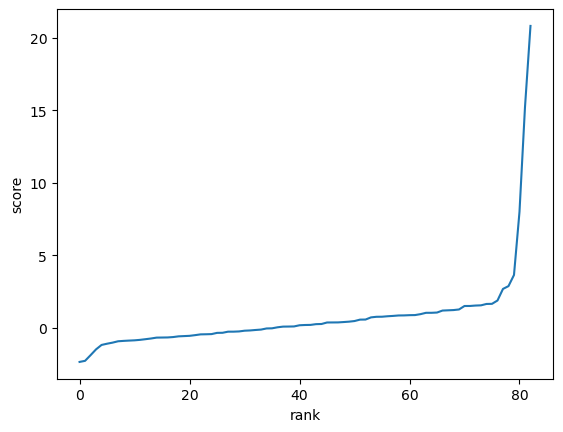

In [12]:
plt.plot(sorted(creator_with_score))
plt.ylabel("score")
plt.xlabel("rank")
plt.show()